<a href="https://colab.research.google.com/github/DrPasidth/Thailand-IOT-4.0/blob/master/FaceRecognitionBlackpinkByKai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2

In [2]:
import numpy as np

In [3]:
!pip install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566170 sha256=24521073c870c4647b47e5bed5e3e1ab887220ff804263ae727662faa78f7da1
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [4]:
import face_recognition as face_rec

In [5]:
jennie_image = face_rec.load_image_file("/content/jennie1.png")

In [6]:
jisoo_image = face_rec.load_image_file("/content/jisoo1.png")

In [7]:
lisa_image = face_rec.load_image_file("/content/lisa1.png")

In [8]:
rose_image = face_rec.load_image_file("/content/rose1.png")

In [9]:
jennie_face_encoding = face_rec.face_encodings(jennie_image)[0]

In [10]:
jisoo_face_encoding = face_rec.face_encodings(jisoo_image)[0]

In [11]:
lisa_face_encoding = face_rec.face_encodings(lisa_image)[0]

In [12]:
rose_face_encoding = face_rec.face_encodings(rose_image)[0]

#Deploy

In [13]:
face_locations = []
face_encodings = []
face_names = []
face_percent = []

In [14]:
known_face_encodings = [jennie_face_encoding , jisoo_face_encoding,lisa_face_encoding,rose_face_encoding]

In [15]:
known_face_names = ["Jennie", "Jisoo","Lisa","Rose"]

In [16]:
blackpink_image = face_rec.load_image_file("/content/blackpinkall.jpg")

In [17]:
face_locations = face_rec.face_locations(blackpink_image)

In [18]:
print(face_locations)

[(86, 315, 176, 225), (66, 583, 156, 494), (86, 434, 176, 344), (68, 151, 175, 44)]


In [19]:
face_encodings = face_rec.face_encodings(blackpink_image, face_locations)

In [20]:
print(face_encodings)

[array([-5.05812466e-03,  9.42954421e-03,  3.42787579e-02, -9.50020105e-02,
       -2.06421614e-02, -1.77634358e-02, -8.45557675e-02, -1.10115409e-01,
        1.16341904e-01, -1.63944006e-01,  2.01824248e-01, -1.02957711e-01,
       -2.13975370e-01, -3.91850844e-02, -4.59221900e-02,  2.13176787e-01,
       -1.98030800e-01, -1.16845146e-01, -2.03654766e-02,  1.51041076e-02,
        7.19496459e-02,  2.03873701e-02, -1.41141154e-02,  8.85378867e-02,
       -1.21826477e-01, -2.84400225e-01, -1.37544602e-01, -4.40123007e-02,
       -6.80185407e-02, -9.75475311e-02, -5.68997711e-02,  2.54941881e-02,
       -1.73155785e-01,  4.25342470e-02,  6.76991791e-03,  1.21344604e-01,
        3.09975147e-02, -1.41584381e-01,  1.67209983e-01,  6.06176369e-02,
       -2.61872083e-01,  9.05326307e-02,  5.13212420e-02,  2.36709595e-01,
        1.85374200e-01, -2.83551589e-03, -3.98993418e-02, -1.41938686e-01,
        1.46099359e-01, -1.99268252e-01,  4.00947295e-02,  9.69685018e-02,
        2.45261751e-02, 

In [21]:
for face_encoding in face_encodings:
  face_distances = face_rec.face_distance(known_face_encodings, face_encoding)
  best = np.argmin(face_distances)
  print(best)
  face_percent_value = 1-face_distances[best]
  print(face_percent_value)
  if face_percent_value >= 0.5:
    name = known_face_names[best]
    print(name)
    percent = round(face_percent_value*100,2)
    face_percent.append(percent)
  else:
    name = "UNKNOWN"
    face_percent.append(0)
  face_names.append(name)

1
0.7004461370035469
Jisoo
3
0.6270104391490438
Rose
0
0.664157870141548
Jennie
2
0.5836428259306266
Lisa


In [22]:
print(face_percent)

[70.04, 62.7, 66.42, 58.36]


In [23]:
print(face_names)

['Jisoo', 'Rose', 'Jennie', 'Lisa']


In [24]:
for (y1,x2,y2, x1), name in zip(face_locations, face_names):
  cv2.rectangle(blackpink_image, (x1,y1), (x2,y2), (0,255,0), 2)
  cv2.putText(blackpink_image, name, (x1, y1-6),cv2.FONT_HERSHEY_SIMPLEX , 0.6, (255,255,255), 1)

In [25]:
from google.colab.patches import cv2_imshow

In [26]:
blackpink_image = cv2.cvtColor(blackpink_image,cv2.COLOR_RGB2BGR)

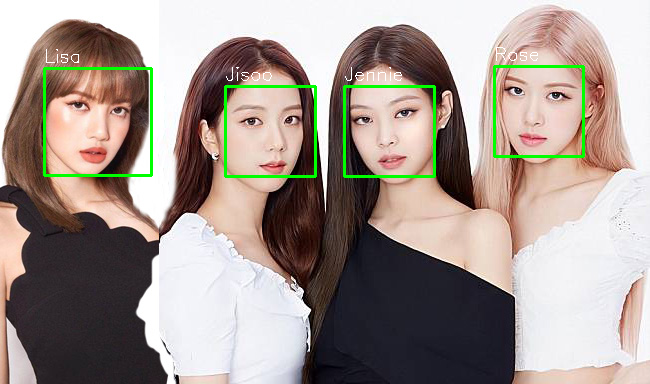

In [27]:
cv2_imshow(blackpink_image)